#  RNN Text Classification  

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from itertools import product
from sklearn.metrics import f1_score

import pandas as pd, matplotlib.pyplot as plt
import dataset,  keras_model, numpy_rnn

In [ ]:
train_ds, val_ds, (vect, x_test, y_test) = dataset.prepare_datasets(seed=42)

for x_batch, y_batch in train_ds.take(1):
    print("Tokenized:", x_batch.numpy()[0])
    print("Label   :",  y_batch.numpy()[0])


Tokenized: [  37    2  318   62    2   51  137   12   20   78   38   44 2549   13
  165    3  108  377  635  402   69  193 2406  320  325  325    2 1843
   14    2   26   83   63  449  397    4  689  333  814    8    4  237
   58    7 2507    2  337    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Label   : [1. 0. 0.]


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3339 - loss: 1.1508 - sce: 1.1507 - val_accuracy: 0.3900 - val_loss: 1.0785 - val_sce: 1.0784 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4252 - loss: 1.0576 - sce: 1.0575 - val_accuracy: 0.4300 - val_loss: 1.0651 - val_sce: 1.0650 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5504 - loss: 0.9852 - sce: 0.9851 - val_accuracy: 0.4800 - val_loss: 1.0479 - val_sce: 1.0479 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6412 - loss: 0.9138 - sce: 0.9138 - val_accuracy: 0.4900 - val_loss: 1.0292 - val_sce: 1.0292 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7219 - loss: 0.8556 - sce: 0.8555 - val_accuracy: 0.5100 - val_loss: 1.0107 - val_sce: 1.0107 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7128 - loss: 0.8093 - sce: 0.809

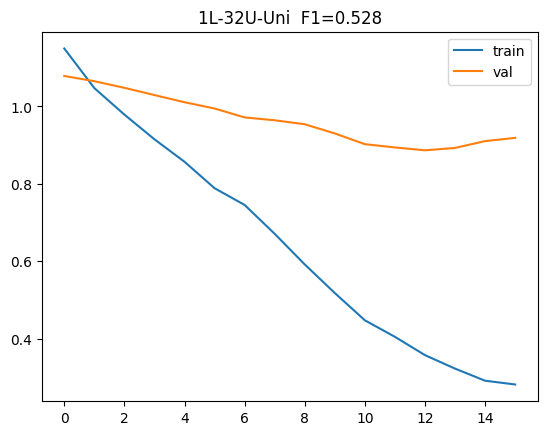

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3365 - loss: 1.1419 - sce: 1.1418 - val_accuracy: 0.3500 - val_loss: 1.0744 - val_sce: 1.0743 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3958 - loss: 1.0373 - sce: 1.0372 - val_accuracy: 0.3800 - val_loss: 1.0521 - val_sce: 1.0520 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5236 - loss: 0.9595 - sce: 0.9594 - val_accuracy: 0.4000 - val_loss: 1.0374 - val_sce: 1.0373 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5632 - loss: 0.9284 - sce: 0.9283 - val_accuracy: 0.4300 - val_loss: 1.0106 - val_sce: 1.0105 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6836 - loss: 0.8370 - sce: 0.8369 - val_accuracy: 0.5200 - val_loss: 0.9707 - val_sce: 0.9706 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7836 - loss: 0.7501 - sce: 0.750

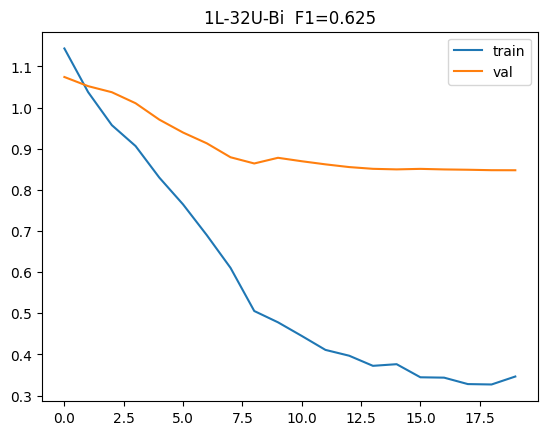

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3255 - loss: 1.1494 - sce: 1.1493 - val_accuracy: 0.4200 - val_loss: 1.0870 - val_sce: 1.0869 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4087 - loss: 1.0796 - sce: 1.0795 - val_accuracy: 0.4600 - val_loss: 1.0579 - val_sce: 1.0578 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5237 - loss: 0.9635 - sce: 0.9634 - val_accuracy: 0.5200 - val_loss: 1.0288 - val_sce: 1.0287 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6726 - loss: 0.8777 - sce: 0.8776 - val_accuracy: 0.5800 - val_loss: 0.9720 - val_sce: 0.9719 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7407 - loss: 0.8055 - sce: 0.8054 - val_accuracy: 0.5400 - val_loss: 0.9657 - val_sce: 0.9656 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7749 - loss: 0.7348 - sce: 0.734

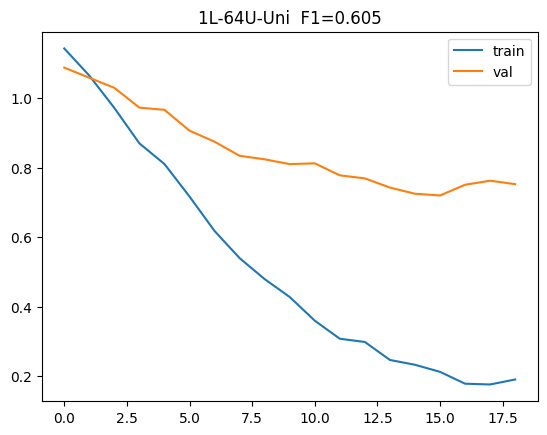

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.3312 - loss: 1.1365 - sce: 1.1363 - val_accuracy: 0.3400 - val_loss: 1.0705 - val_sce: 1.0703 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4510 - loss: 1.0625 - sce: 1.0623 - val_accuracy: 0.3900 - val_loss: 1.0432 - val_sce: 1.0430 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4875 - loss: 0.9893 - sce: 0.9891 - val_accuracy: 0.4500 - val_loss: 1.0230 - val_sce: 1.0229 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6187 - loss: 0.9109 - sce: 0.9108 - val_accuracy: 0.5000 - val_loss: 1.0027 - val_sce: 1.0025 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7207 - loss: 0.8165 - sce: 0.8164 - val_accuracy: 0.5300 - val_loss: 0.9709 - val_sce: 0.9707 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7966 - loss: 0.6982 - sce: 0.698

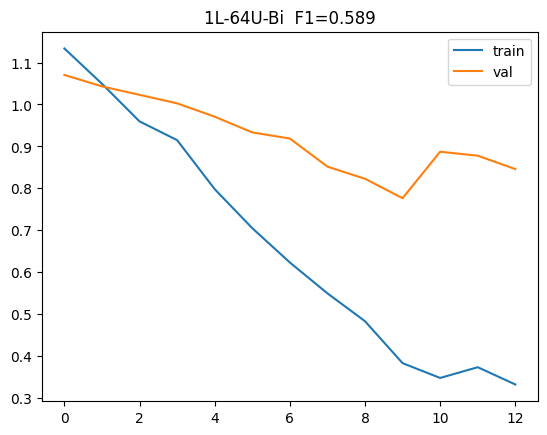

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3533 - loss: 1.1377 - sce: 1.1375 - val_accuracy: 0.4000 - val_loss: 1.0558 - val_sce: 1.0557 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4615 - loss: 1.0413 - sce: 1.0412 - val_accuracy: 0.3900 - val_loss: 1.0305 - val_sce: 1.0304 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4708 - loss: 1.0049 - sce: 1.0047 - val_accuracy: 0.5000 - val_loss: 0.9984 - val_sce: 0.9982 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5990 - loss: 0.9074 - sce: 0.9072 - val_accuracy: 0.4700 - val_loss: 1.0140 - val_sce: 1.0138 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6570 - loss: 0.8210 - sce: 0.8209 - val_accuracy: 0.5100 - val_loss: 1.0072 - val_sce: 1.0071 - learning_rate: 5.0000e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7019 - loss: 0.7592 - sce: 0

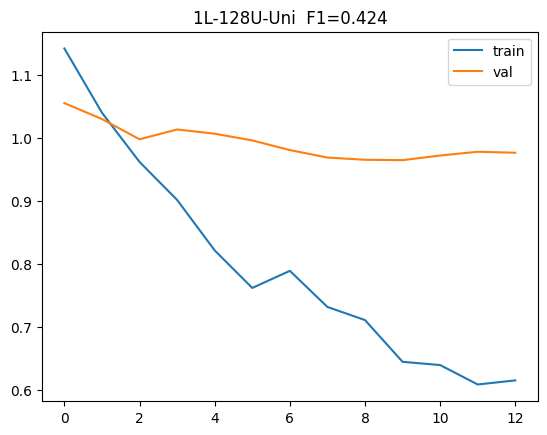

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.3302 - loss: 1.1645 - sce: 1.1643 - val_accuracy: 0.3800 - val_loss: 1.0646 - val_sce: 1.0644 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4583 - loss: 1.0632 - sce: 1.0630 - val_accuracy: 0.4600 - val_loss: 1.0190 - val_sce: 1.0188 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5602 - loss: 0.9655 - sce: 0.9652 - val_accuracy: 0.4500 - val_loss: 1.0067 - val_sce: 1.0064 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6195 - loss: 0.9011 - sce: 0.9008 - val_accuracy: 0.5100 - val_loss: 0.9519 - val_sce: 0.9516 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7419 - loss: 0.8031 - sce: 0.8028 - val_accuracy: 0.5400 - val_loss: 0.9493 - val_sce: 0.9491 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8032 - loss: 0.6825 - sce: 0.682

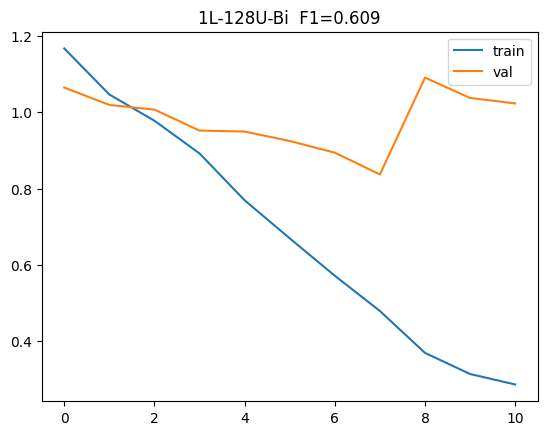

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3199 - loss: 1.2154 - sce: 1.2153 - val_accuracy: 0.3800 - val_loss: 1.0967 - val_sce: 1.0967 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3884 - loss: 1.1312 - sce: 1.1311 - val_accuracy: 0.4500 - val_loss: 1.0356 - val_sce: 1.0355 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4440 - loss: 1.0609 - sce: 1.0608 - val_accuracy: 0.3800 - val_loss: 1.0232 - val_sce: 1.0231 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4735 - loss: 1.0081 - sce: 1.0080 - val_accuracy: 0.4200 - val_loss: 1.0051 - val_sce: 1.0050 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6050 - loss: 0.9102 - sce: 0.9101 - val_accuracy: 0.4900 - val_loss: 0.9973 - val_sce: 0.9972 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5736 - loss: 0.8825 - sce: 0.882

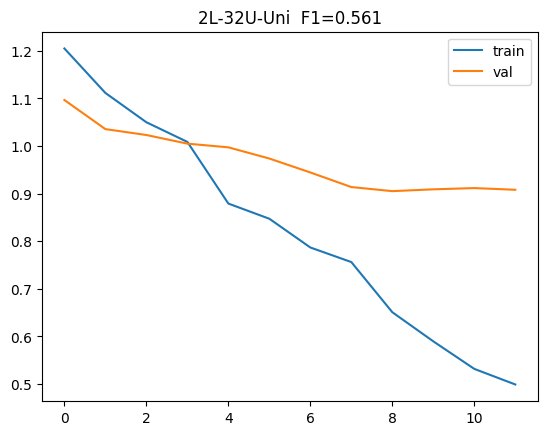

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.2988 - loss: 1.3309 - sce: 1.3307 - val_accuracy: 0.3200 - val_loss: 1.1420 - val_sce: 1.1419 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4214 - loss: 1.1274 - sce: 1.1273 - val_accuracy: 0.3600 - val_loss: 1.1099 - val_sce: 1.1097 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4425 - loss: 1.0545 - sce: 1.0543 - val_accuracy: 0.3800 - val_loss: 1.0842 - val_sce: 1.0841 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5044 - loss: 1.0450 - sce: 1.0448 - val_accuracy: 0.4400 - val_loss: 1.0560 - val_sce: 1.0558 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5552 - loss: 0.9369 - sce: 0.9367 - val_accuracy: 0.4900 - val_loss: 1.0242 - val_sce: 1.0240 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6698 - loss: 0.8297 - sce: 0.829

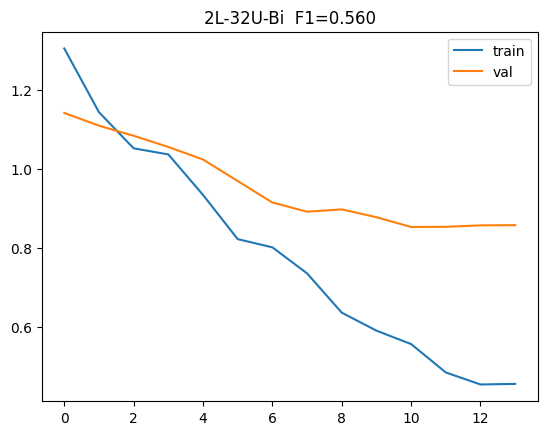

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.3330 - loss: 1.2878 - sce: 1.2877 - val_accuracy: 0.3700 - val_loss: 1.0790 - val_sce: 1.0789 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3950 - loss: 1.1966 - sce: 1.1965 - val_accuracy: 0.3900 - val_loss: 1.0372 - val_sce: 1.0371 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5017 - loss: 1.0553 - sce: 1.0552 - val_accuracy: 0.4500 - val_loss: 1.0271 - val_sce: 1.0269 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5439 - loss: 0.9389 - sce: 0.9387 - val_accuracy: 0.4400 - val_loss: 1.0051 - val_sce: 1.0049 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5358 - loss: 0.9362 - sce: 0.9360 - val_accuracy: 0.5100 - val_loss: 0.9797 - val_sce: 0.9795 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6486 - loss: 0.8418 - sce: 0.841

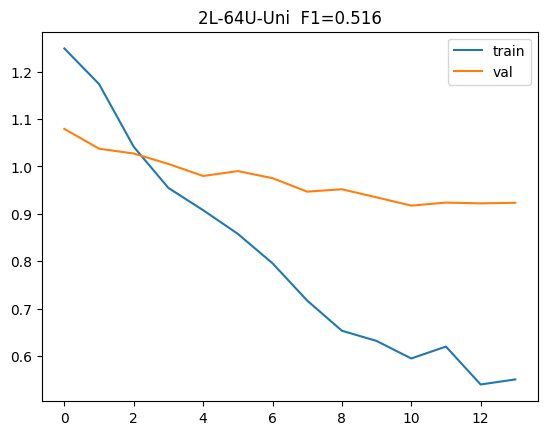

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.3620 - loss: 1.2165 - sce: 1.2162 - val_accuracy: 0.4500 - val_loss: 1.0356 - val_sce: 1.0353 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4497 - loss: 1.0920 - sce: 1.0917 - val_accuracy: 0.5100 - val_loss: 1.0503 - val_sce: 1.0500 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5004 - loss: 1.0052 - sce: 1.0048 - val_accuracy: 0.5200 - val_loss: 1.0185 - val_sce: 1.0182 - learning_rate: 5.0000e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5261 - loss: 0.9711 - sce: 0.9707 - val_accuracy: 0.6200 - val_loss: 0.9333 - val_sce: 0.9329 - learning_rate: 5.0000e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5576 - loss: 0.8919 - sce: 0.8916 - val_accuracy: 0.6200 - val_loss: 0.8942 - val_sce: 0.8938 - learning_rate: 5.0000e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6521 - loss: 0.8511

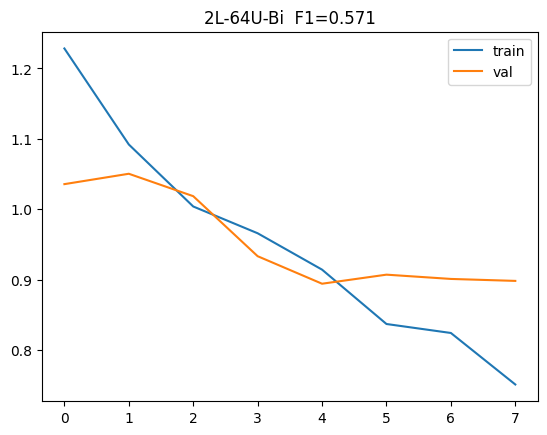

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.3364 - loss: 1.2597 - sce: 1.2595 - val_accuracy: 0.3600 - val_loss: 1.0998 - val_sce: 1.0995 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4202 - loss: 1.1324 - sce: 1.1321 - val_accuracy: 0.4300 - val_loss: 1.1115 - val_sce: 1.1112 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4523 - loss: 1.0965 - sce: 1.0962 - val_accuracy: 0.4000 - val_loss: 1.0895 - val_sce: 1.0892 - learning_rate: 5.0000e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5264 - loss: 0.9867 - sce: 0.9864 - val_accuracy: 0.4800 - val_loss: 1.0652 - val_sce: 1.0649 - learning_rate: 5.0000e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4831 - loss: 1.0455 - sce: 1.0453 - val_accuracy: 0.5100 - val_loss: 1.0366 - val_sce: 1.0363 - learning_rate: 5.0000e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5904 - loss: 0.8869 

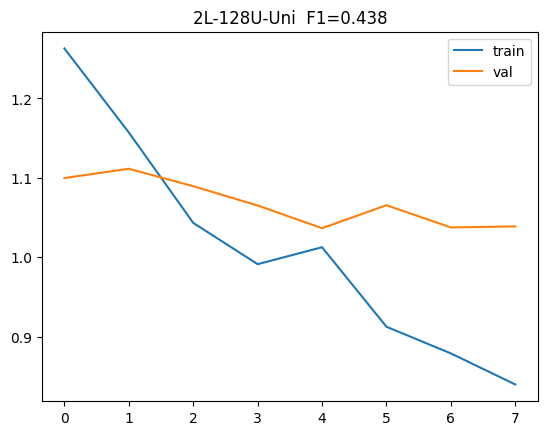

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.3209 - loss: 1.2843 - sce: 1.2837 - val_accuracy: 0.4200 - val_loss: 1.0838 - val_sce: 1.0832 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.4251 - loss: 1.1219 - sce: 1.1213 - val_accuracy: 0.4400 - val_loss: 1.0999 - val_sce: 1.0993 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.4879 - loss: 1.0431 - sce: 1.0425 - val_accuracy: 0.4800 - val_loss: 1.0240 - val_sce: 1.0234 - learning_rate: 5.0000e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5462 - loss: 0.9463 - sce: 0.9457 - val_accuracy: 0.4900 - val_loss: 1.0360 - val_sce: 1.0354 - learning_rate: 5.0000e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5953 - loss: 0.9127 - sce: 0.9121 - val_accuracy: 0.5100 - val_loss: 0.9917 - val_sce: 0.9911 - learning_rate: 2.5000e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5283 - loss: 0.9193

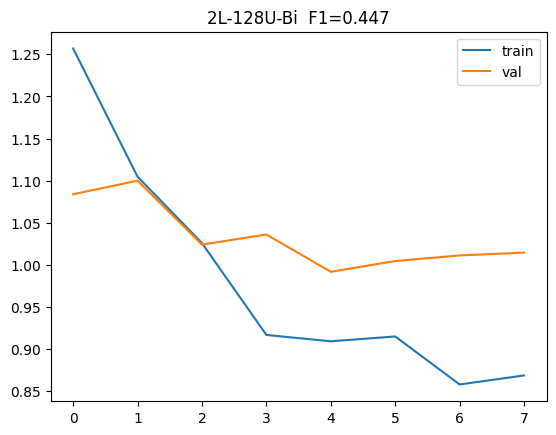

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.3330 - loss: 1.2810 - sce: 1.2809 - val_accuracy: 0.4100 - val_loss: 1.0610 - val_sce: 1.0609 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3440 - loss: 1.2132 - sce: 1.2131 - val_accuracy: 0.4600 - val_loss: 1.0400 - val_sce: 1.0399 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3716 - loss: 1.1495 - sce: 1.1494 - val_accuracy: 0.4600 - val_loss: 1.0212 - val_sce: 1.0211 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4359 - loss: 1.0808 - sce: 1.0807 - val_accuracy: 0.5200 - val_loss: 0.9883 - val_sce: 0.9882 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4348 - loss: 1.0945 - sce: 1.0944 - val_accuracy: 0.5200 - val_loss: 0.9571 - val_sce: 0.9570 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4991 - loss: 0.9841 - sce: 0.984

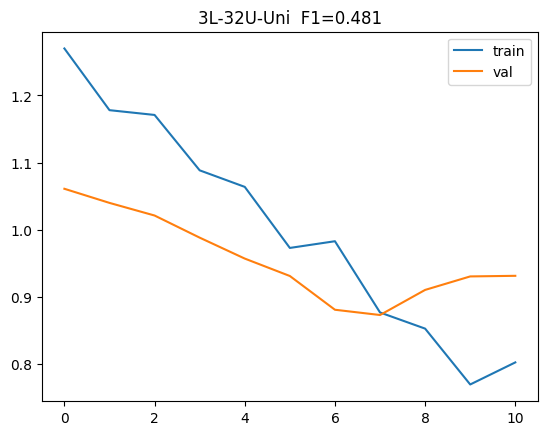

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.3435 - loss: 1.3296 - sce: 1.3293 - val_accuracy: 0.4100 - val_loss: 1.0788 - val_sce: 1.0786 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3471 - loss: 1.3078 - sce: 1.3075 - val_accuracy: 0.4100 - val_loss: 1.0432 - val_sce: 1.0429 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4091 - loss: 1.2148 - sce: 1.2145 - val_accuracy: 0.4700 - val_loss: 0.9936 - val_sce: 0.9933 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4461 - loss: 1.1645 - sce: 1.1642 - val_accuracy: 0.5600 - val_loss: 0.9616 - val_sce: 0.9613 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4553 - loss: 1.0460 - sce: 1.0458 - val_accuracy: 0.5700 - val_loss: 0.8928 - val_sce: 0.8925 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5383 - loss: 0.9906 - sce: 0.99

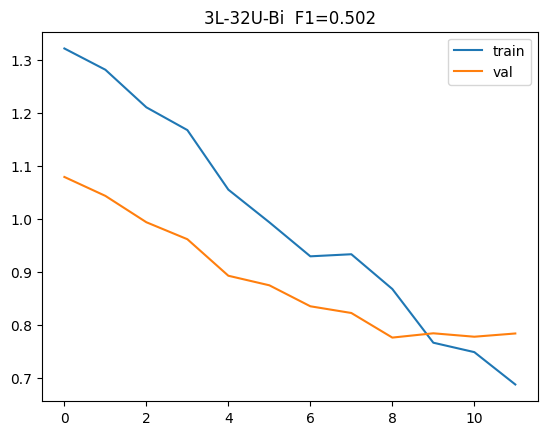

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.2936 - loss: 1.3420 - sce: 1.3418 - val_accuracy: 0.3700 - val_loss: 1.1211 - val_sce: 1.1209 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3789 - loss: 1.2380 - sce: 1.2378 - val_accuracy: 0.4500 - val_loss: 1.0819 - val_sce: 1.0817 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4150 - loss: 1.1573 - sce: 1.1571 - val_accuracy: 0.4500 - val_loss: 1.0659 - val_sce: 1.0657 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4073 - loss: 1.1653 - sce: 1.1651 - val_accuracy: 0.4500 - val_loss: 1.0416 - val_sce: 1.0414 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4472 - loss: 1.0356 - sce: 1.0354 - val_accuracy: 0.4200 - val_loss: 1.0579 - val_sce: 1.0577 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 1.0421 - sce: 1.041

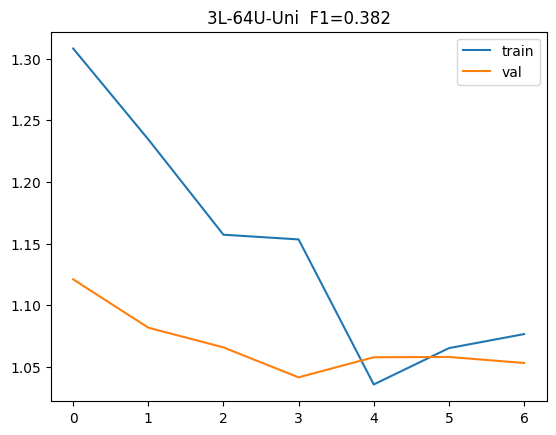

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.3525 - loss: 1.3145 - sce: 1.3140 - val_accuracy: 0.5600 - val_loss: 0.9743 - val_sce: 0.9738 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3825 - loss: 1.2172 - sce: 1.2167 - val_accuracy: 0.5400 - val_loss: 0.9427 - val_sce: 0.9422 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4365 - loss: 1.1306 - sce: 1.1301 - val_accuracy: 0.5300 - val_loss: 0.9426 - val_sce: 0.9421 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4221 - loss: 1.1401 - sce: 1.1396 - val_accuracy: 0.5100 - val_loss: 0.9860 - val_sce: 0.9854 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4768 - loss: 1.0733 - sce: 1.0728 - val_accuracy: 0.5300 - val_loss: 0.9543 - val_sce: 0.9538 - learning_rate: 5.0000e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5097 - loss: 1.0052 - sce: 

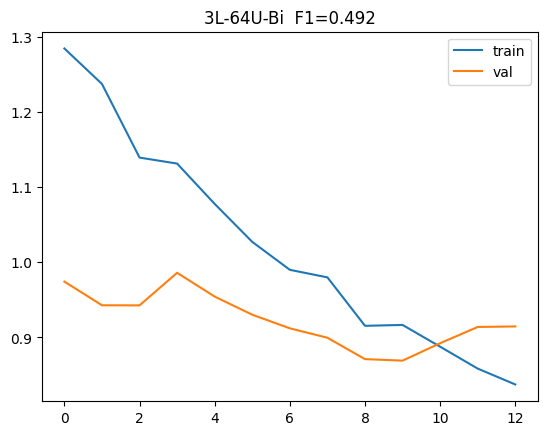

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.3056 - loss: 1.4278 - sce: 1.4275 - val_accuracy: 0.4400 - val_loss: 1.1219 - val_sce: 1.1215 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4210 - loss: 1.1624 - sce: 1.1620 - val_accuracy: 0.4500 - val_loss: 1.1461 - val_sce: 1.1457 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4079 - loss: 1.1721 - sce: 1.1717 - val_accuracy: 0.4600 - val_loss: 1.1763 - val_sce: 1.1760 - learning_rate: 5.0000e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4240 - loss: 1.1237 - sce: 1.1233 - val_accuracy: 0.4700 - val_loss: 1.1828 - val_sce: 1.1824 - learning_rate: 2.5000e-04
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


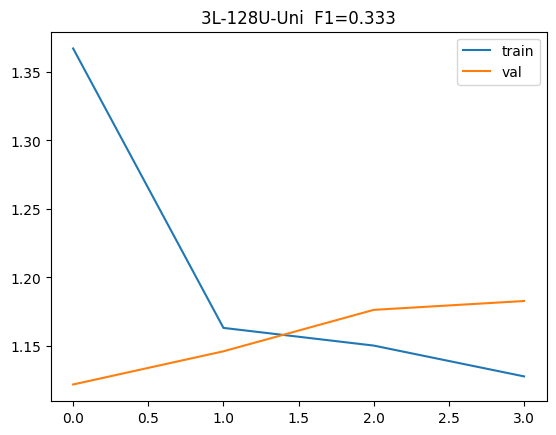

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 319ms/step - accuracy: 0.3084 - loss: 1.4493 - sce: 1.4483 - val_accuracy: 0.4100 - val_loss: 1.1390 - val_sce: 1.1380 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.3865 - loss: 1.3029 - sce: 1.3020 - val_accuracy: 0.4800 - val_loss: 1.0239 - val_sce: 1.0230 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.4255 - loss: 1.2225 - sce: 1.2215 - val_accuracy: 0.5200 - val_loss: 1.0759 - val_sce: 1.0749 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.4980 - loss: 1.0463 - sce: 1.0454 - val_accuracy: 0.5400 - val_loss: 1.0688 - val_sce: 1.0678 - learning_rate: 5.0000e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 323ms/step - accuracy: 0.4992 - loss: 1.1096 - sce: 1.1087 - val_accuracy: 0.5400 - val_loss: 1.0573 - val_sce: 1.0563 - learning_rate: 2.5000e-04
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


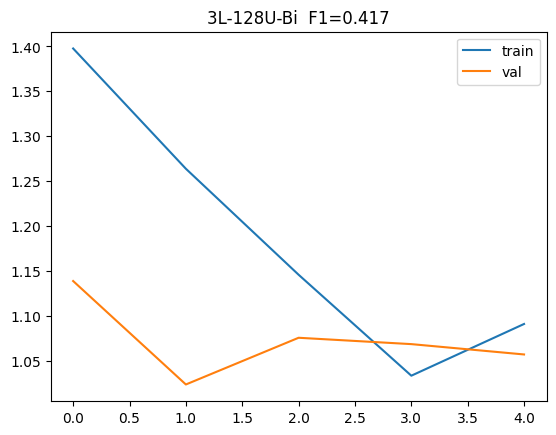

    layers  units  bidirectional        f1
0        1     32          False  0.528148
1        1     32           True  0.625268
2        1     64          False  0.604711
3        1     64           True  0.588726
4        1    128          False  0.424365
5        1    128           True  0.608751
6        2     32          False  0.561134
7        2     32           True  0.560240
8        2     64          False  0.516052
9        2     64           True  0.570563
10       2    128          False  0.437578
11       2    128           True  0.446875
12       3     32          False  0.481256
13       3     32           True  0.502067
14       3     64          False  0.382368
15       3     64           True  0.491549
16       3    128          False  0.332830
17       3    128           True  0.417136
bidirectional     False     True 
layers units                     
1      32      0.528148  0.625268
       64      0.604711  0.588726
       128     0.424365  0.608751
2      32    

In [ ]:
def run_cfg(num_layers, units, bi,seed=42):
    tf.keras.utils.set_random_seed(seed)        
    tf.keras.backend.clear_session()      
    m = keras_model.build_rnn_model(
        vocab_size=vect.vocabulary_size(),
        num_layers=num_layers,
        units=units,
        bidirectional=bi
    )
    h = m.fit(
        train_ds, validation_data=val_ds,
        epochs=20,
        callbacks = [
            tf.keras.callbacks.ReduceLROnPlateau(monitor="val_sce",
                                                factor=0.5, patience=1, min_lr=1e-5),
            tf.keras.callbacks.EarlyStopping(monitor="val_sce",
                                            patience=3, restore_best_weights=True)
        ]
    )
    y_pred = m.predict(vect(x_test)).argmax(1)
    f1 = f1_score(y_test, y_pred, average="macro")
    plt.figure(); plt.plot(h.history["loss"]); plt.plot(h.history["val_loss"])
    plt.title(f"{num_layers}L-{units}U-{'Bi' if bi else 'Uni'}  F1={f1:.3f}")
    plt.legend(["train","val"]); plt.show()
    return f1


layers_list = [1, 2, 3]
units_list  = [32, 64, 128]
bi_list     = [False, True]

results = []
for L, U, bi in product(layers_list, units_list, bi_list):
    f1 = run_cfg(L, U, bi)
    results.append({
        "layers": L,
        "units": U,
        "bidirectional": bi,
        "f1": f1
    })

df = pd.DataFrame(results)
print(df)

pivot = df.pivot_table(
    index=["layers","units"],
    columns="bidirectional",
    values="f1"
)
print(pivot)

In [ ]:
import os, shutil, tensorflow as tf, dataset,  keras_model

SAVE_DIR        = "saved"
WEIGHTS_PATH    = os.path.join(SAVE_DIR, "rnn32bi.weights.h5")
VECTORIZER_PATH = os.path.join(SAVE_DIR, "vectorizer.keras")

os.makedirs(SAVE_DIR, exist_ok=True)

train_ds, val_ds, (vect, x_test, y_test) = dataset.prepare_datasets(seed=42)

best_model = keras_model.build_rnn_model(
    vocab_size=vect.vocabulary_size(),
    num_layers=1,
    units=32,
    bidirectional=True,
    dropout=0.3,
    rec_dropout=0.15,     
)

best_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor="val_sce", factor=0.5, patience=1, min_lr=1e-5
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor="val_sce", patience=3, restore_best_weights=True
        ),
    ],
    verbose=2,
)


if os.path.exists(WEIGHTS_PATH):
    os.remove(WEIGHTS_PATH)
best_model.save_weights(WEIGHTS_PATH)

if os.path.exists(VECTORIZER_PATH):
    shutil.rmtree(VECTORIZER_PATH) if os.path.isdir(VECTORIZER_PATH) \
        else os.remove(VECTORIZER_PATH)

vect_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[], dtype=tf.string),
    vect
])
vect_model.save(VECTORIZER_PATH)

print("✅  Bobot & vectorizer tersimpan di folder 'saved/'")


Epoch 1/20
8/8 - 3s - 345ms/step - accuracy: 0.3160 - loss: 1.1477 - sce: 1.1476 - val_accuracy: 0.3700 - val_loss: 1.0696 - val_sce: 1.0695 - learning_rate: 0.0010
Epoch 2/20
8/8 - 0s - 20ms/step - accuracy: 0.4200 - loss: 1.0418 - sce: 1.0417 - val_accuracy: 0.3400 - val_loss: 1.0412 - val_sce: 1.0411 - learning_rate: 0.0010
Epoch 3/20
8/8 - 0s - 20ms/step - accuracy: 0.5080 - loss: 0.9899 - sce: 0.9898 - val_accuracy: 0.4000 - val_loss: 1.0215 - val_sce: 1.0214 - learning_rate: 0.0010
Epoch 4/20
8/8 - 0s - 20ms/step - accuracy: 0.6000 - loss: 0.9062 - sce: 0.9061 - val_accuracy: 0.4600 - val_loss: 0.9952 - val_sce: 0.9951 - learning_rate: 0.0010
Epoch 5/20
8/8 - 0s - 24ms/step - accuracy: 0.7040 - loss: 0.8397 - sce: 0.8396 - val_accuracy: 0.5600 - val_loss: 0.9575 - val_sce: 0.9574 - learning_rate: 0.0010
Epoch 6/20
8/8 - 0s - 20ms/step - accuracy: 0.7900 - loss: 0.7472 - sce: 0.7471 - val_accuracy: 0.6000 - val_loss: 0.9083 - val_sce: 0.9082 - learning_rate: 0.0010
Epoch 7/20
8/8 

d:\Sem6\ML\IF3270_Tubes2_23\.venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
from numpy_rnn import NumpyRNNModel

numpy_model = NumpyRNNModel(
    weights_h5   = "saved/rnn32bi.weights.h5",
    vect_path    = "saved/vectorizer.keras",
    num_layers   = 1,
    units        = 32,
    bidirectional= True,
    max_len      = 64       
)

texts  = ["Pelayanan bus DAMRI sangat baik"]
probas = numpy_model.predict_proba(texts)
preds  = numpy_model.predict(texts)

print(probas) 
print(preds)    


[[0.7344175  0.24898182 0.0166007 ]]
[0]
